<a href="https://colab.research.google.com/github/sbooeshaghi/colosseum/blob/master/analysis/archimedian_spiral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import matplotlib.patches as mpatches
import math
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as mtick


plt.rcParams.update({'font.size': 20})
%config InlineBackend.figure_format = 'retina'

In [2]:
def spiral_points(arc=1, separation=1):
    """generate points on an Archimedes' spiral
    with `arc` giving the length of arc between two points
    and `separation` giving the distance between consecutive 
    turnings
    - approximate arc length with circle arc at given distance
    - use a spiral equation r = b * phi
    """
    def p2c(r, phi):
        """polar to cartesian
        """
        return (r * math.cos(phi), r * math.sin(phi))

    # yield a point at origin
    yield (0, 0)

    # initialize the next point in the required distance
    r = arc
    b = separation / (2 * math.pi)
    # find the first phi to satisfy distance of `arc` to the second point
    phi = float(r) / b
    while True:
        yield p2c(r, phi)
        # advance the variables
        # calculate phi that will give desired arc length at current radius
        # (approximating with circle)
        phi += float(arc) / r
        r = b * phi

In [3]:
xx = []
yy = []
n_tubes = 88
data = np.zeros((n_tubes,2))
for idx, i in enumerate(spiral_points(arc=13, separation=19.5)):
    if idx==n_tubes:
        break
    data[idx] = i


In [4]:
theta = []
for x, y in data:
    t = math.atan2(y,x)
    theta.append(t)
theta = np.array(theta)*180*200/np.pi/360

In [5]:
b = 19.5/(2*np.pi)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in true_divide


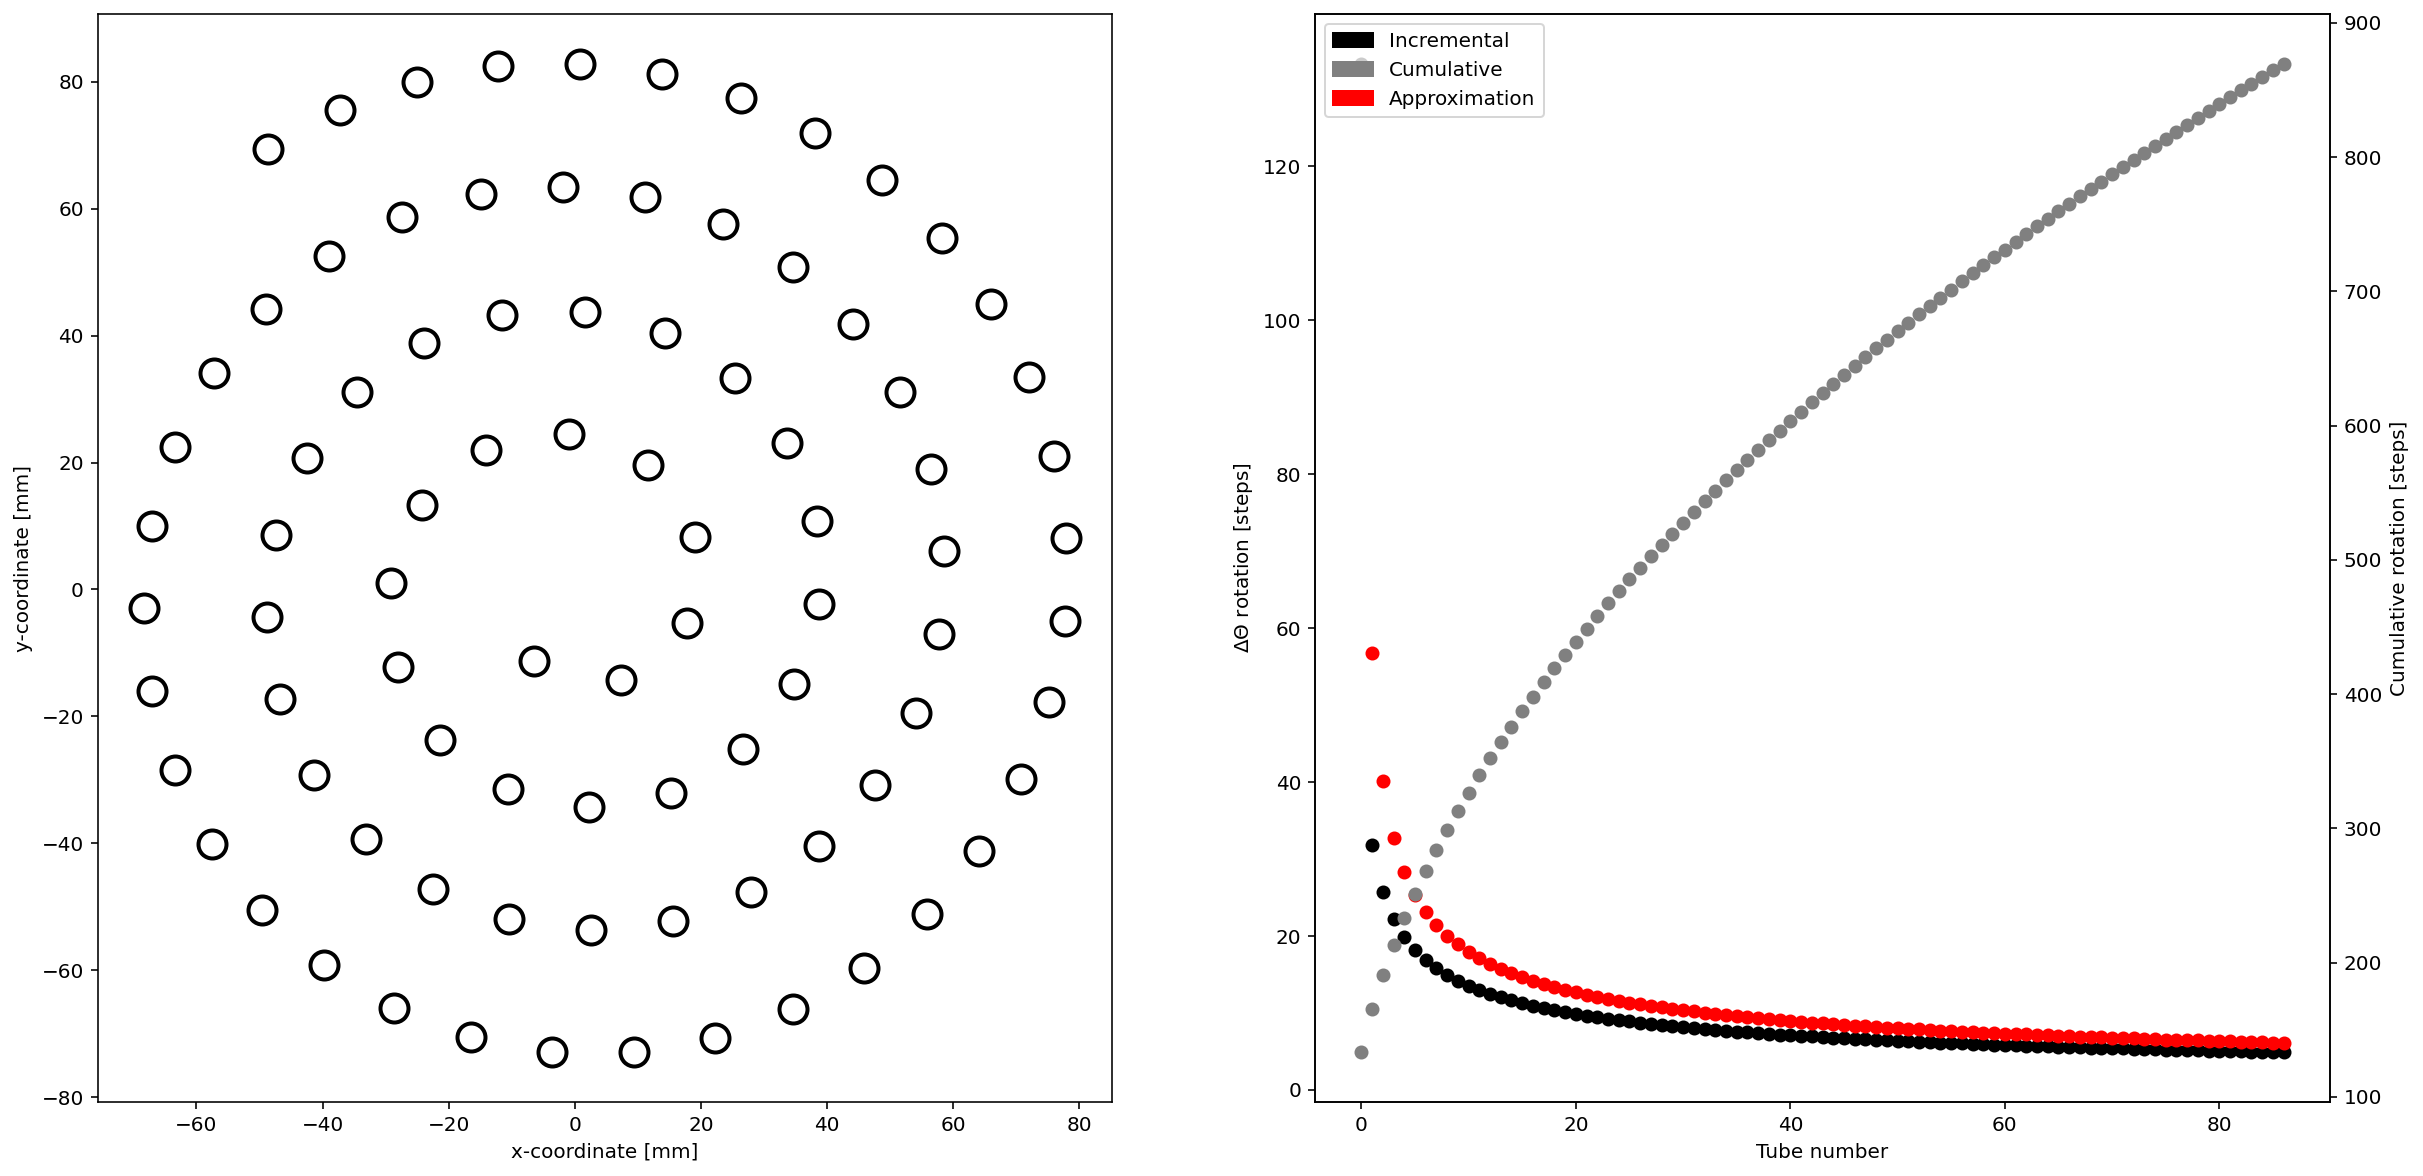

In [6]:
fig, ax = plt.subplots(figsize=(10*2, 10), ncols=2)

xx = data[:,0][1:]
yy = data[:,1][1:]

ax[0].plot(xx,yy, 'o', ms=14, markerfacecolor="None",markeredgecolor='black', markeredgewidth=2)
ax[0].set_xlabel("x-coordinate [mm]")
ax[0].set_ylabel("y-coordinate [mm]")

ax2 = ax[1].twinx()
xx = np.arange(len(theta)-1)
yy = theta[1:] - theta[:-1]

# to fix the the jump in theta due to branch cuts
# we add a contant back to those values that cross the
# branch. There is certainly a more elegant way to do this.

for idx, i in enumerate(yy):
    if i < -50:
        yy[idx] = yy[idx] + 200

ax[1].scatter(xx, yy, color="black")
ax2.scatter(xx, np.cumsum(yy), color="grey", zorder=-1)
ax2.set_ylabel("Cumulative rotation [steps]")
ax[1].scatter(xx, np.pi/np.sqrt(b*xx)*180*200/np.pi/360, color='r')

ax[1].set_xlabel("Tube number")
ax[1].set_ylabel("$\Delta \Theta$ rotation [steps]")

grey_patch = mpatches.Patch(color='grey', label='Cumulative')
black_patch = mpatches.Patch(color='black', label='Incremental')
red_patch = mpatches.Patch(color='red', label='Approximation')

plt.legend(handles=[black_patch, grey_patch, red_patch], loc="upper left")

# plt.savefig("../figures/analytical.pdf", bbox_inches='tight')
# plt.savefig("../figures/analytical.png", bbox_inches='tight', dpi=100)


fig.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


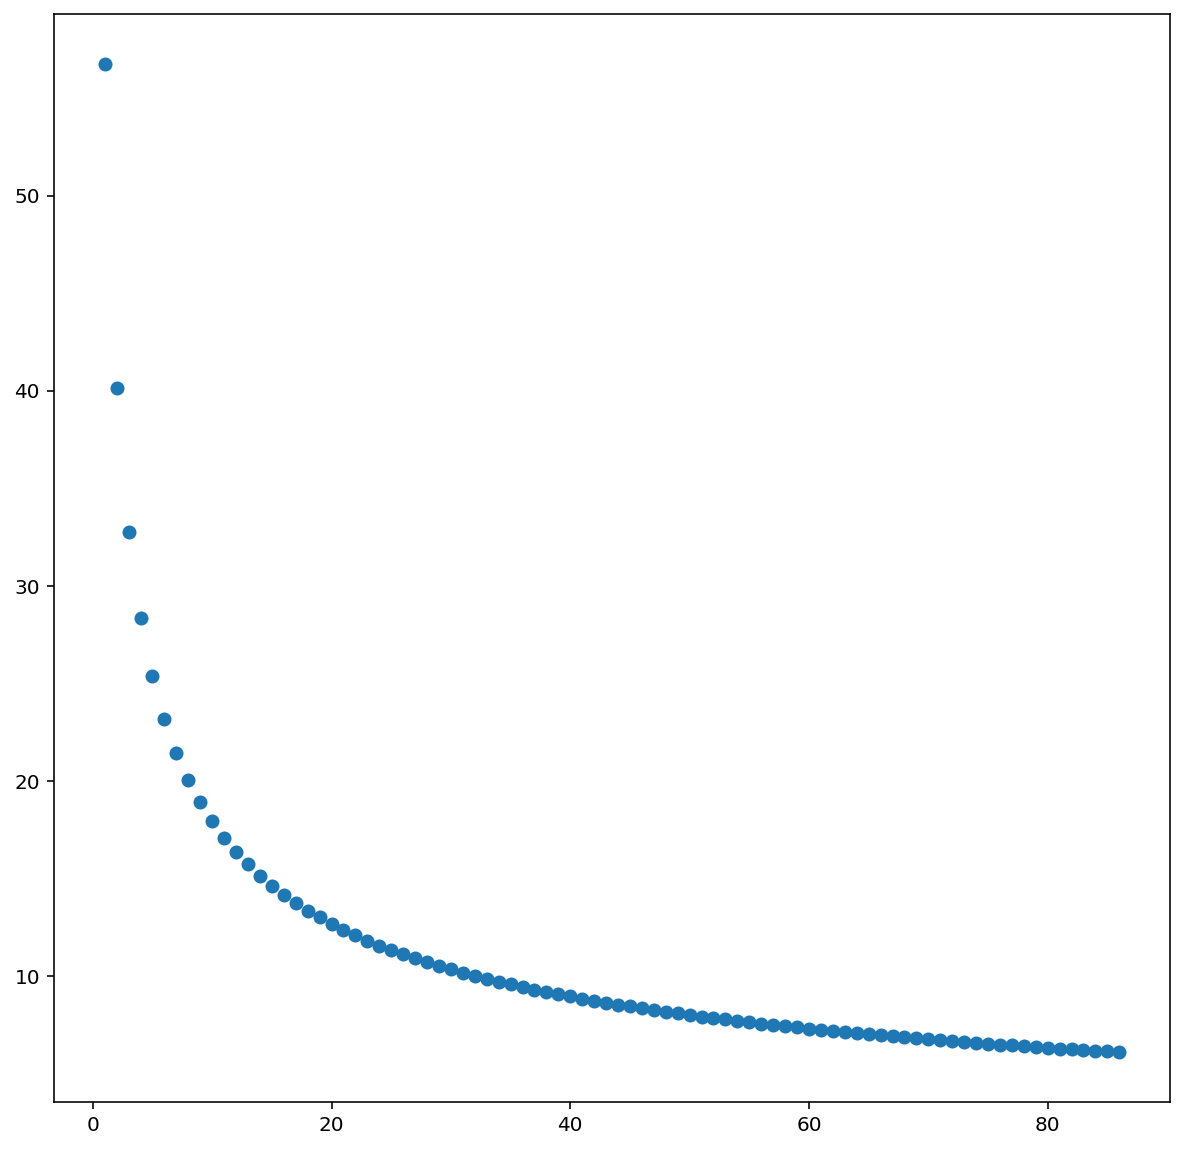

In [7]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(xx, np.pi/np.sqrt(b*xx)*180*200/np.pi/360)

plt.show()